# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [10]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [5]:
Y = data['affair']

In [11]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [13]:
model.fit(X_train, Y_train)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [14]:
predictions = model.predict_proba(X_test)

In [16]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [17]:
model.score(X_test, Y_test)

0.7303664921465969

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

### Оценка качества модели

Считаем accuracy последней модели

In [18]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [19]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7303664921465969

In [20]:
precision = tp / (tp + fp)
precision

0.632183908045977

### Используем готовые библиотеки

In [21]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [22]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [23]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.3247726056714821, 1.0, 0.08200155690438675)
(0.32441113490364026, 0.9983525535420099, 0.08300810915773554)
(0.3245848955543653, 0.9983525535420099, 0.08357748879089243)
(0.3247588424437299, 0.9983525535420099, 0.0838306065833758)
(0.3251072961373391, 0.9983525535420099, 0.08475896611040408)
(0.3252818035426731, 0.9983525535420099, 0.08496227312423021)
(0.32545649838882923, 0.9983525535420099, 0.08521919479853925)
(0.32563138097796884, 0.9983525535420099, 0.0858432327270606)
(0.32526881720430106, 0.9967051070840197, 0.08616148568559939)
(0.3254437869822485, 0.9967051070840197, 0.0869005995326725)
(0.32561894510226047, 0.9967051070840197, 0.08720526853258756)
(0.32579429186860526, 0.9967051070840197, 0.08769540909243696)
(0.3254310344827586, 0.9950576606260296, 0.08782839444642625)
(0.3256064690026954, 0.9950576606260296, 0.08853007188725048)
(0.325782092772384, 0.9950576606260296, 0.0888283490194934)
(0.326133909287257, 0.9950576606260296, 0.08940124712928343)
(0.3263101026472177, 0.

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
# plt.plot( re, pr )

In [28]:
from sklearn.metrics import average_precision_score

In [29]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5752962677471827

### ROC

In [ ]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [ ]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [ ]:
for line in zip( fpr, tpr, thres ):
    print( line )

In [ ]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [ ]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

In [ ]:
model2 = LogisticRegression()

In [ ]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [ ]:
model2.fit( X_train_short, Y_train )

In [ ]:
predictions2 = model2.predict_proba( X_test_short )

In [ ]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [38]:
from sklearn.metrics import roc_curve

In [37]:
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7447431538674533

In [32]:
roc_auc_score( Y_test, predictions2[:, 1] )

NameError: name 'predictions2' is not defined

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc( fpr, tpr )

In [ ]:
auc( fpr2, tpr2 )

## Пример влияния L1 и L2-регуляризации

In [33]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

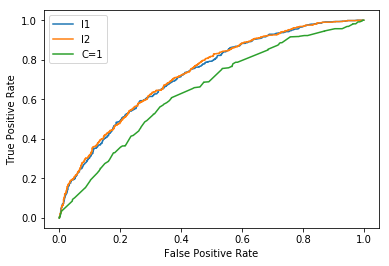

In [40]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [41]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [42]:
Y = data['affair']

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [44]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [46]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

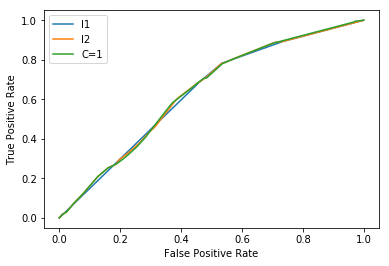

In [47]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()